In [2]:
import os
import nibabel as nib
from nilearn import plotting
import warnings

warnings.filterwarnings("ignore")

# Combine 4D atalses into 3D atlas

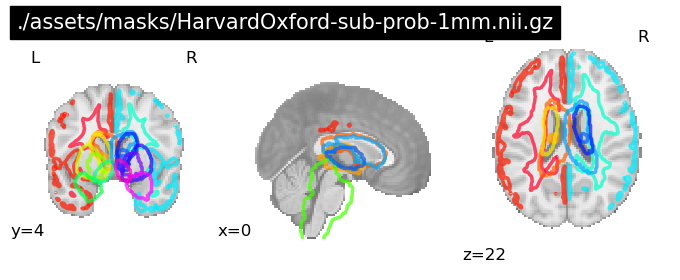

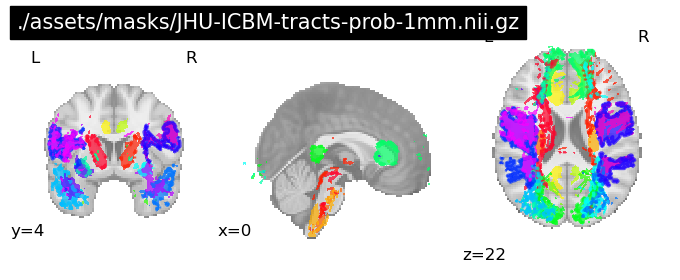

In [5]:
# Plot the original prob masks
atlas_path = "./assets/masks/"
files = [
    "HarvardOxford-sub-prob-1mm.nii.gz",
    "JHU-ICBM-tracts-prob-1mm.nii.gz",
]
atlas_paths = [os.path.join(atlas_path, file) for file in files]
# plot listed atlases with nilearn.plotting.plot_prob_atlas
for file in atlas_paths:
    img = nib.load(file)
    plotting.plot_prob_atlas(img, title=file, draw_cross=False, threshold="auto")
    plotting.show()

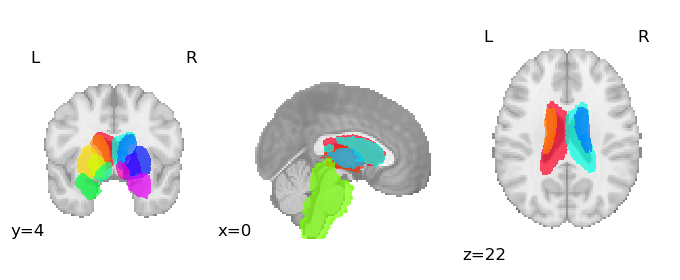

In [6]:
from neuroimager.utils import filter_rois

harvard_sub = nib.load("./assets/masks/HarvardOxford-sub-prob-1mm.nii.gz")
rois_to_remove = [0, 1, 11, 12]  # remove the cortical regions in this atlas
output_path = "./assets/output/filtered_harvard_sub.nii.gz"
filtered_atlas = filter_rois(harvard_sub, rois_to_remove, output_path)
plotting.plot_prob_atlas(filtered_atlas, draw_cross=False, threshold="auto")
plotting.show()

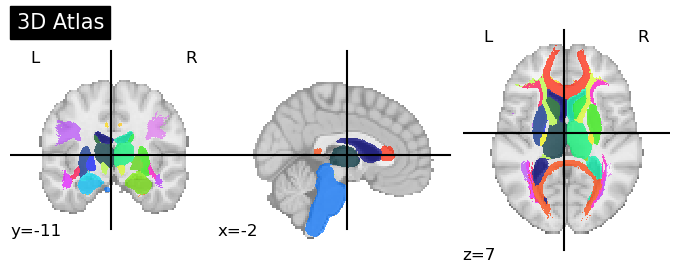

In [7]:
from neuroimager.utils import combine_probabilistic_atlases

atlas_paths = [
    "./assets/output/filtered_harvard_sub.nii.gz",
    "./assets/masks/JHU-ICBM-tracts-prob-1mm.nii.gz",
]
combined_atlas = combine_probabilistic_atlases(
    atlas_paths, "./assets/output/combined_prob_atlas.nii.gz"
)
plotting.plot_roi(combined_atlas, title="3D Atlas")
plotting.show()